In [1]:
import json
import matplotlib.pyplot as plt
import time

from collections import deque
from IPython.display import display, clear_output
from datetime import datetime, timedelta
from kafka import KafkaConsumer

In [2]:
KAFKA_TOPIC = "data-viz"
KAFKA_BROKER = "localhost:9092"

consumer = KafkaConsumer(KAFKA_TOPIC, bootstrap_servers=KAFKA_BROKER, auto_offset_reset='earliest')

In [3]:
for msg in consumer:
    data = json.loads(msg.value)
    price = data['price']
    dt = data['timestamp']
    print(f"Received ({dt}, {price})")
    time.sleep(0.5)

Received (2023-12-01T09:00:00, 27.94956577000215)
Received (2023-12-01T09:01:00, 27.494152608317187)
Received (2023-12-01T09:02:00, 20.759819495382146)
Received (2023-12-01T09:03:00, 18.563351938920132)
Received (2023-12-01T09:04:00, 16.263717614536823)
Received (2023-12-01T09:05:00, 10.879904963170326)
Received (2023-12-01T09:06:00, 12.435131910201013)
Received (2023-12-01T09:07:00, 18.79260183922784)
Received (2023-12-01T09:08:00, 18.203246356015413)
Received (2023-12-01T09:09:00, 27.75018421285605)
Received (2023-12-01T09:10:00, 27.52046936718808)
Received (2023-12-01T09:11:00, 34.78621236286921)
Received (2023-12-01T09:12:00, 34.41485248349247)
Received (2023-12-01T09:13:00, 27.453909514701643)
Received (2023-12-01T09:14:00, 21.301743298006325)
Received (2023-12-01T09:15:00, 14.430321627582995)
Received (2023-12-01T09:16:00, 12.17201089441009)
Received (2023-12-01T09:17:00, 13.125562669025284)
Received (2023-12-01T09:18:00, 11.429544818979359)
Received (2023-12-01T09:19:00, 18.6528

KeyboardInterrupt: 

KeyboardInterrupt: 

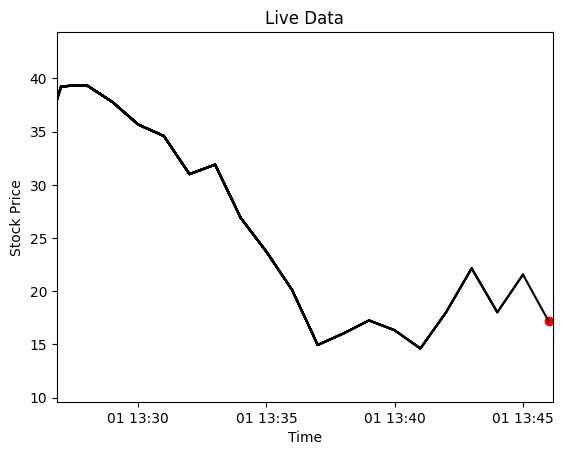

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Live Data')
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')

max_history = 20
x_stream = deque(maxlen=max_history)
y_stream = deque(maxlen=max_history)
red_dot, = ax.plot([], [], 'ro')
for msg in consumer:
    data = json.loads(msg.value)
    price = data['price']
    timestamp = data['timestamp']
    dt = datetime.fromisoformat(timestamp)
    x_stream.append(dt)
    y_stream.append(price)
    red_dot.set_xdata(dt)
    red_dot.set_ydata(price)
    ax.plot(x_stream, y_stream, 'k-')
    ax.set_xlim(
        min(x_stream)-timedelta(seconds=10), 
        max(x_stream)+timedelta(seconds=10))
    ax.set_ylim(min(y_stream)-5, max(y_stream)+5)

    display(fig)
    clear_output(wait=True)
    time.sleep(1)
